# EDA (Exploratory data analysis)
Let's break down data so I know with what I am working.

In [10]:
import sys
sys.path.append('/home/mcygert/Dev/is-it-ai')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from utils.data_ops import get_whole_dataset
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


True

In [11]:
root_path = "../data/"
full_training_data = get_whole_dataset(root_path)

In [12]:
number_of_examples = len(full_training_data.index)
generated_by_ai_examples = (full_training_data["label"] == 1).sum()
user_generated_examples = (full_training_data["label"] == 0).sum()
print(f"Number of all examples = {number_of_examples} | Number of examples which where generated by ai = {generated_by_ai_examples} | Written by people = {user_generated_examples}")

Number of all examples = 46246 | Number of examples which where generated by ai = 17500 | Written by people = 28746


## Prepare methods for calculating characteristics of feature text

In [19]:
count_number_of_sentences = lambda text: len(sent_tokenize(text))
count_number_of_words = lambda text: len(text.split())
average_word_length = lambda text: np.mean([len(w) for w in str(text).split()])
average_sentence_lenght = lambda text: np.mean([len(w.split()) for w in sent_tokenize(text)])

## Apply all methods to dataframe

In [20]:
full_training_data['number_of_sentences'] = full_training_data['text'].map(count_number_of_sentences)
full_training_data['number_of_words'] = full_training_data['text'].map(count_number_of_words)
full_training_data['average_word_length'] = full_training_data['text'].map(average_word_length)
full_training_data['average_sentence_lenght'] = full_training_data['text'].map(average_sentence_lenght)

In [21]:
def get_mean_values_of_metadata(df):
    columns = ['number_of_sentences', 'number_of_words', 'average_word_length', 'average_sentence_lenght']
    return {key:df[key].mean() for key in columns}
    
ai_generated = full_training_data[full_training_data['label'] == 1]
human_written = full_training_data[full_training_data['label'] == 0]
ai_generated_metadata = get_mean_values_of_metadata(ai_generated)
human_written_metadata = get_mean_values_of_metadata(human_written)
human_written_metadata

{'number_of_sentences': 21.23770263688861,
 'number_of_words': 424.9072914492451,
 'average_word_length': 4.539323490435802,
 'average_sentence_lenght': 21.983800609100218}

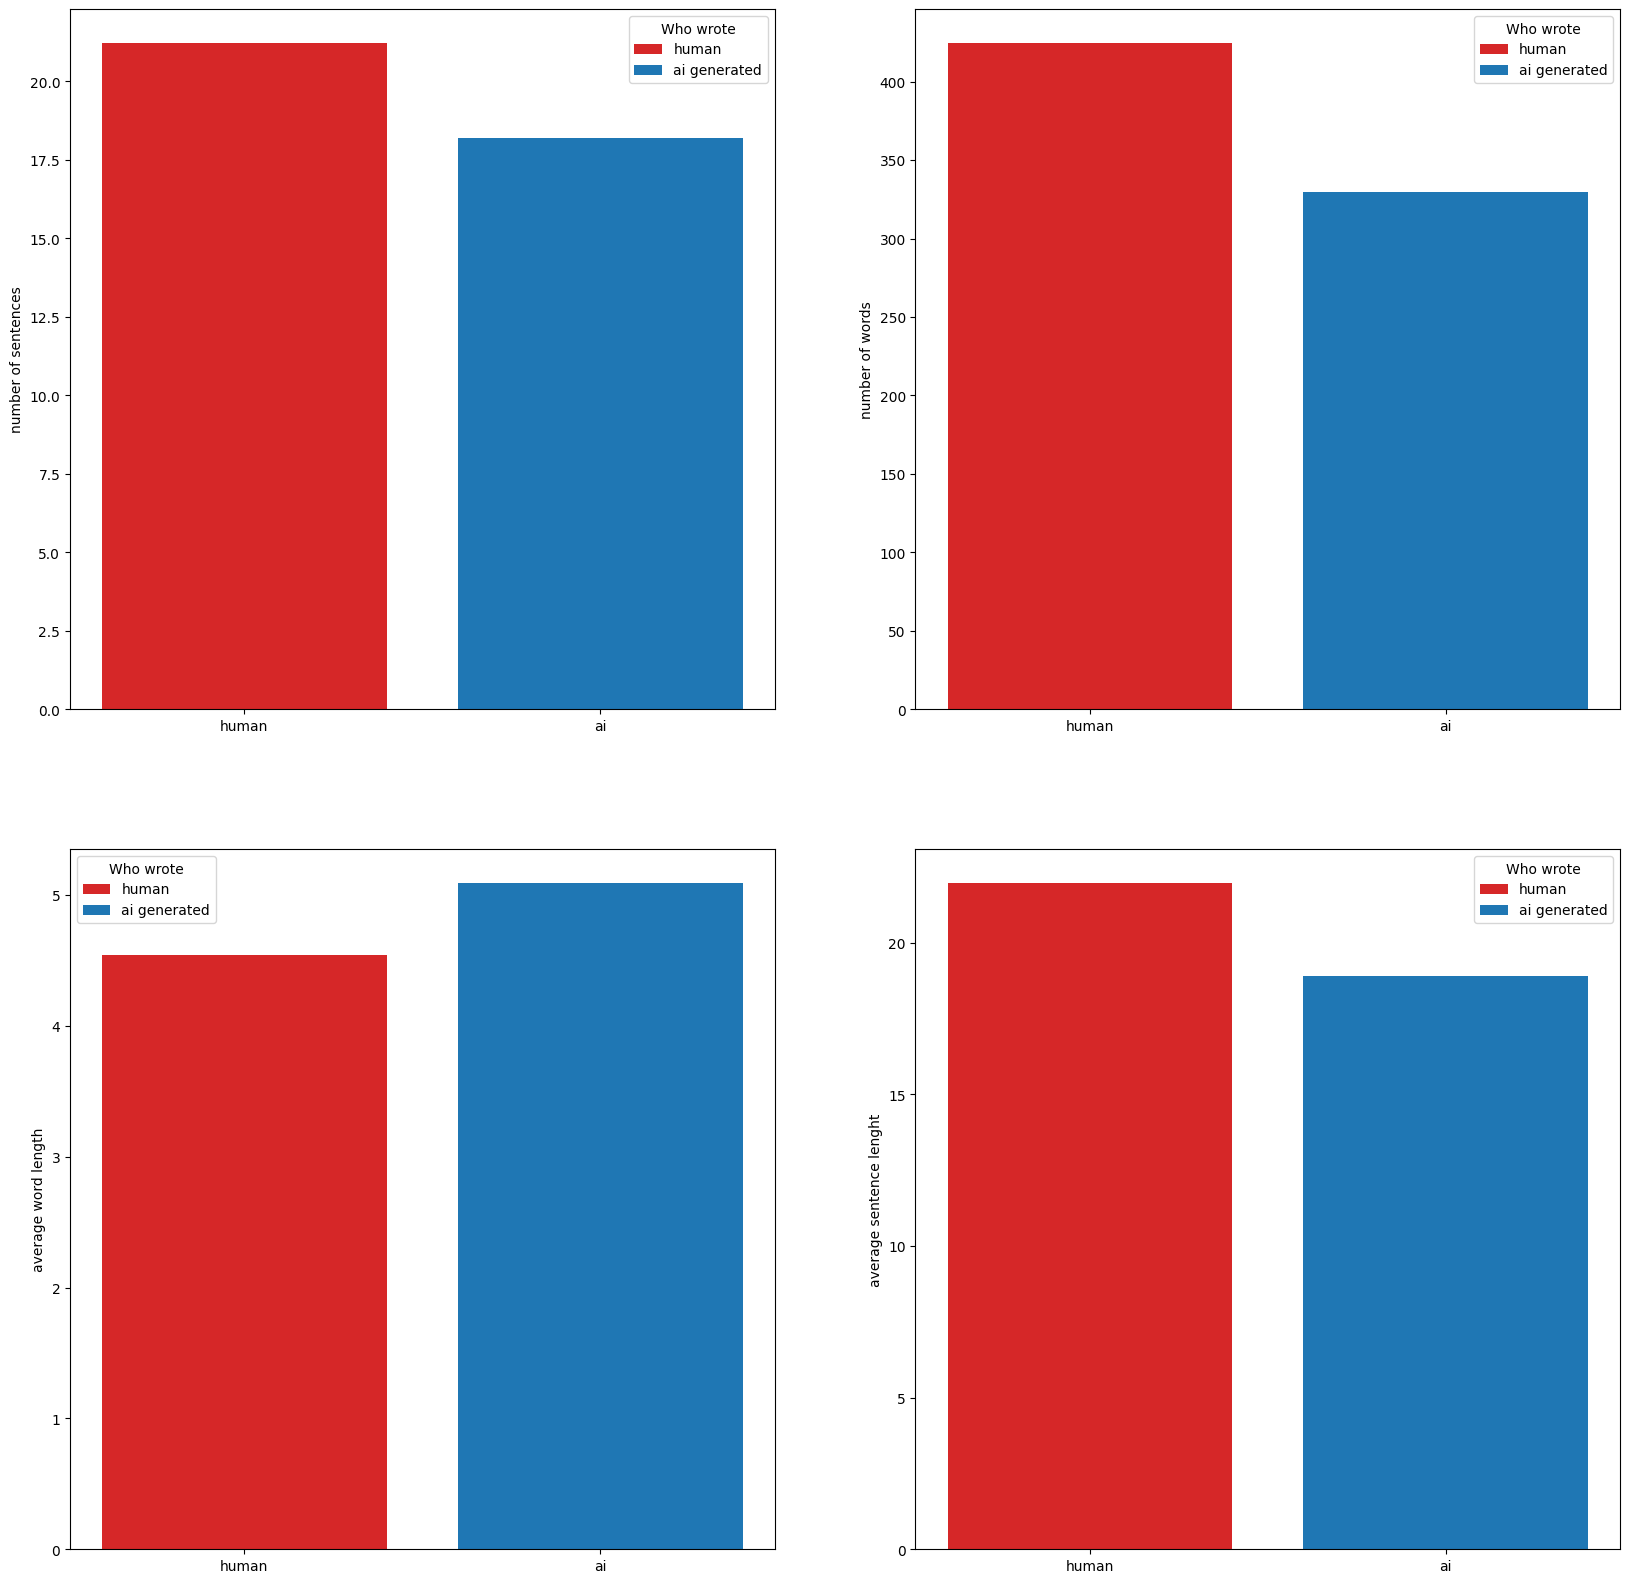

In [22]:
def plot_metadata_means(ai_metadata, human_metadata):
    columns = ['number_of_sentences', 'number_of_words', 'average_word_length', 'average_sentence_lenght']
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    for column_name, ax in zip(columns, axs.flat): 
        bar_labels = ['human', 'ai generated']
        bar_colors = ['tab:red', 'tab:blue']
        column = ['human', 'ai']
        ax.bar(column, [human_metadata[column_name] ,ai_metadata[column_name]], label=bar_labels, color=bar_colors)
        ax.set_ylabel(column_name.replace('_', " "))
        ax.legend(title='Who wrote')
    plt.show()
plot_metadata_means(ai_generated_metadata, human_written_metadata)

## Plots which could give more insights
[ ] - Boxplot on length of sentence lenght

[ ] - Boxplot on length of whole text lenght